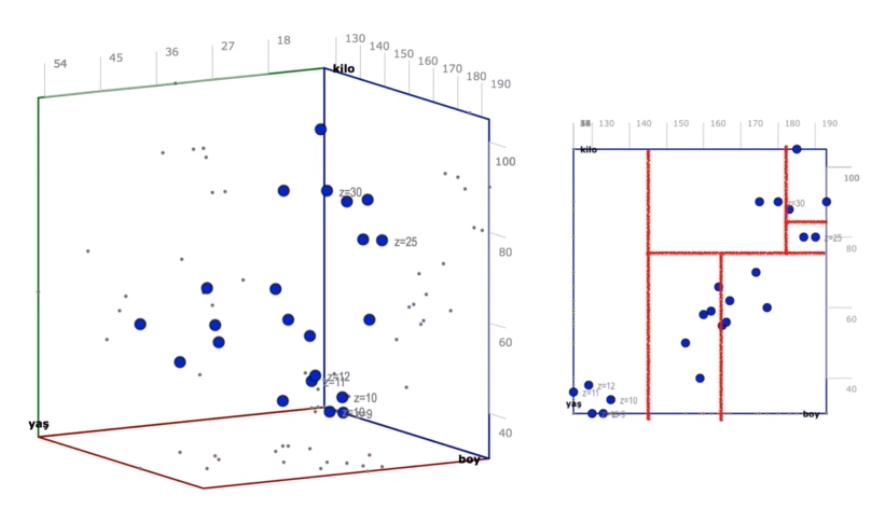

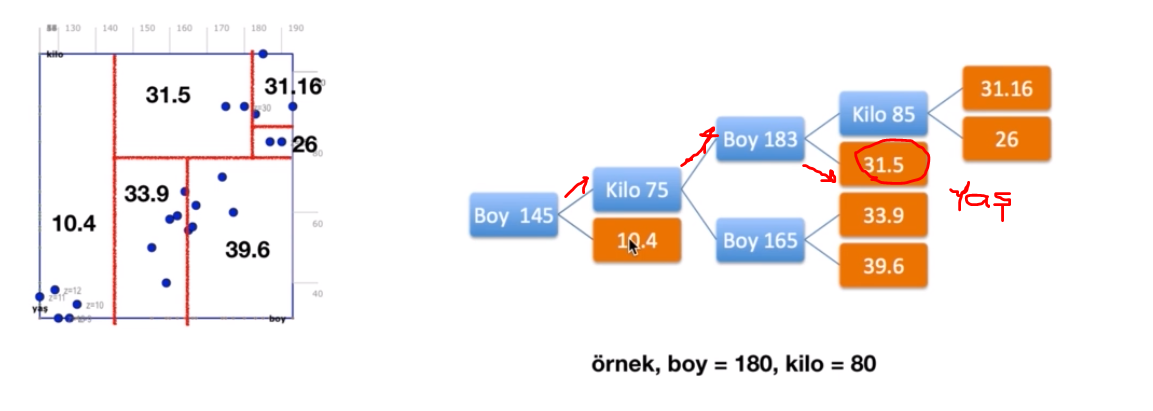

In [7]:
import pandas as pd

In [8]:
df = pd.read_excel("salaries.xlsx")
df.head()

company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0

In [9]:
inputs = df.drop('salary_more_then_100k', axis=1)

In [10]:
target = df["salary_more_then_100k"]

In [11]:
inputs

company                  job     degree
0       google      sales executive  bachelors
1       google      sales executive    masters
2       google     business manager  bachelors
3       google     business manager    masters
4       google  computer programmer  bachelors
5       google  computer programmer    masters
6   abc pharma      sales executive    masters
7   abc pharma  computer programmer  bachelors
8   abc pharma     business manager  bachelors
9   abc pharma     business manager    masters
10    facebook      sales executive  bachelors
11    facebook      sales executive    masters
12    facebook     business manager  bachelors
13    facebook     business manager    masters
14    facebook  computer programmer  bachelors
15    facebook  computer programmer    masters

Machine learning process only works with numeric values. That's why we need to convert company, job and degree datas from categorical to numeric!

In [12]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

- Less than 100k is encoded as 0
- More than 100 k is encoded as 1

In [13]:
from sklearn.preprocessing import LabelEncoder
#we need to create an objet for each categorical column and we will encoding it:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [14]:
inputs["company_n"] = le_company.fit_transform(inputs["company"])
inputs["job_n"] = le_job.fit_transform(inputs["job"])
inputs["degree_n"] = le_degree.fit_transform(inputs["degree"])

In [15]:
#We turn the categorical columns to numeric ones so we can just drop these categorical columns, let' make a new df for this:
inputs_n = inputs.drop(['company', 'job', 'degree'], axis=1)
inputs_n

company_n  job_n  degree_n
0           2      2         0
1           2      2         1
2           2      0         0
3           2      0         1
4           2      1         0
5           2      1         1
6           0      2         1
7           0      1         0
8           0      0         0
9           0      0         1
10          1      2         0
11          1      2         1
12          1      0         0
13          1      0         1
14          1      1         0
15          1      1         1

- google is encoded as 2
- abc pharma is encoded as 0
- facebook is encoded as 1

In [16]:
#Now all the data is ready toı train the model, lets import tree form decision tree:
from sklearn import tree

In [17]:
model = tree.DecisionTreeClassifier()

In [18]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [19]:
model.score(inputs_n, target)

1.0

In [20]:
#predict a salary for google, businnes manager, masters degree:
model.predict([[2,1,1]])

array([1], dtype=int64)

In [ ]:
#The output above states that the salary is more than 100k